# Quantum Galton Box: Binomial to Gaussian with Grover-Rudolph Method

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.1); font-family: Arial, sans-serif; color: #34495e; font-size: 16px;">

  <h1 style="color: #2c3e50;">Task 2: Quantum Galton Box Simulation</h1>

  <p>
    This notebook implements a quantum circuit for a Galton Box with <i>n</i> layers, encoding a binomial distribution using the Grover-Rudolph method.
  </p>

  <div style="text-align: center; font-size: 18px; margin: 10px 0; color: #2c3e50;">
    <b><i>p(k) = C(n, k) / 2ⁿ</i></b>
  </div>

  <p>
    We verify its approximation to a Gaussian distribution and compare it to a classical Monte Carlo simulation for efficiency and accuracy. The project aligns with UN SDG 9 (Industry, Innovation, and Infrastructure) by advancing quantum algorithm development for scalable simulations.
  </p>

</div>


---

## 1. Introduction

<div style="background-color: #e8f4f8; padding: 15px; border-left: 5px solid #3498db; border-radius: 8px; box-shadow: 0 4px 6px rgba(0,0,0,0.05); margin-bottom: 20px; font-family: Arial, sans-serif;">

  <h2 style="color: #2c3e50;">Problem Statement</h2>

  <p style="font-size: 14px; color: #34495e;">
    The Galton Box models a binomial distribution through a pegboard where balls fall, approximating a Gaussian distribution for large <i>n</i>. We aim to:
  </p>

  <ul style="font-size: 14px; color: #34495e; margin-top: -10px;">
    <li>Develop a quantum circuit to prepare a state encoding <i>p(k) = C(n, k) / 2<sup>n</sup></i> using the Grover-Rudolph method.</li>
    <li>Verify the state approximates a Gaussian distribution.</li>
    <li>Compare quantum and classical Monte Carlo simulations for computational efficiency and accuracy.</li>
  </ul>

  <p style="font-size: 14px; color: #34495e;">
    <b>Impact:</b> Efficient quantum simulations can accelerate modeling in physics, finance, and sustainability, supporting scalable innovation.
  </p>

</div>


---

## 2. Theoretical Background

<div style="background-color: #fff3cd; padding: 15px; border-left: 5px solid #f1c40f; border-radius: 8px; box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif;">

  <h2 style="color: #2c3e50;">Key Concepts</h2>

  <ul style="font-size: 14px; color: #34495e;">
    <li><b>Galton Box:</b> A physical system where balls fall through <i>n</i> layers of pegs, landing in bins with probabilities following a binomial distribution.</li>
    <li><b>Binomial to Gaussian:</b> For large <i>n</i>, the binomial distribution <i>p(k) = C(n, k) / 2<sup>n</sup></i> approximates a Gaussian via the Central Limit Theorem.</li>
    <li><b>Grover-Rudolph Method:</b> A quantum state preparation technique to encode probability distributions into quantum states using controlled rotations.</li>
    <li><b>Quantum Advantage:</b> Quantum circuits may reduce computational complexity for sampling distributions compared to classical methods.</li>
  </ul>

</div>


---

## 3. Setup and Dependencies

<div style="background-color: #e8f8f0; padding: 15px; border-left: 5px solid #27ae60; border-radius: 8px; box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif;">

  <h2 style="color: #2c3e50;">Environment Setup</h2>

  <p style="font-size: 14px; color: #34495e;">
    Install required libraries and set up the environment for quantum and classical simulations.
  </p>

</div>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from scipy.special import binom
from scipy.stats import norm
import time

# Styling for plots
plt.style.use('seaborn-v0_8')  # Use Seaborn style

---

## 4. Classical Monte Carlo Simulation

<div style="background-color: #f0f0f0; padding: 15px; border-left: 5px solid #7f8c8d; border-radius: 8px; box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif;">

  <h2 style="color: #2c3e50;">Classical Galton Box Simulation</h2>

  <p style="font-size: 14px; color: #34495e;">
    Simulate a Galton Box classically using Monte Carlo methods to generate a binomial distribution and measure runtime.
  </p>

</div>


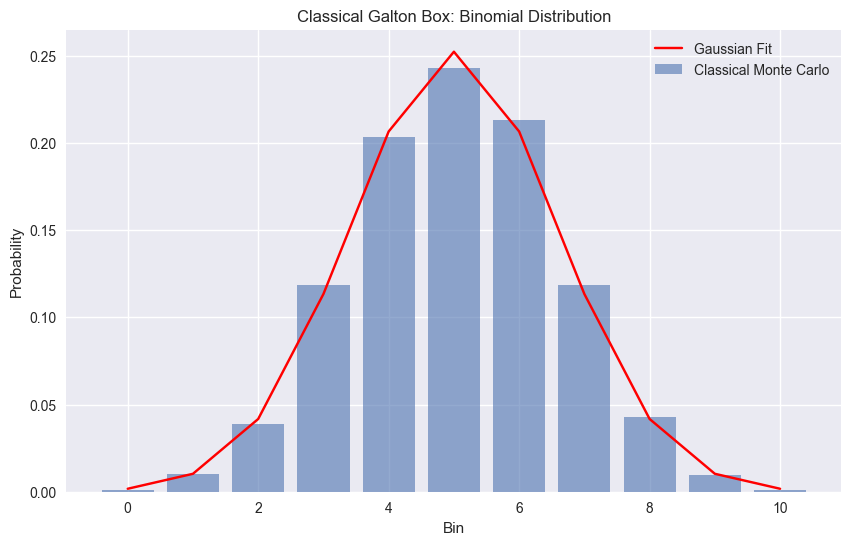

Classical runtime: 0.4173 seconds


In [27]:
def classical_galton_box(n_layers, n_trials):
    bins = np.zeros(n_layers + 1)
    start_time = time.time()
    for _ in range(n_trials):
        pos = 0
        for _ in range(n_layers):
            pos += np.random.choice([0, 1])  # 0 for left, 1 for right
        bins[pos] += 1
    runtime = time.time() - start_time
    probabilities = bins / n_trials
    return probabilities, runtime

# Example: n=10 layers, 10000 trials
n_layers, n_trials = 10, 10000
classical_probs, classical_time = classical_galton_box(n_layers, n_trials)

# Plot results
plt.figure(figsize=(10, 6))
plt.bar(range(n_layers + 1), classical_probs, alpha=0.6, label='Classical Monte Carlo')
plt.plot(range(n_layers + 1), norm.pdf(range(n_layers + 1), n_layers/2, np.sqrt(n_layers/4)), 'r-', label='Gaussian Fit')
plt.title('Classical Galton Box: Binomial Distribution')
plt.xlabel('Bin')
plt.ylabel('Probability')
plt.legend()
plt.show()
print(f"Classical runtime: {classical_time:.4f} seconds")

---

## 5. Quantum Circuit Design

<div style="background-color: #e8f4f8; padding: 15px; border-left: 5px solid #3498db; border-radius: 8px; box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif;">

  <h2 style="color: #2c3e50;">Quantum State Preparation with Grover-Rudolph</h2>

  <p style="font-size: 14px; color: #34495e;">
    Implement a quantum circuit to prepare a state encoding 
    <i>p(k) = C(n, k) / 2<sup>n</sup></i> 
    using the Grover-Rudolph method. Use Qiskit for simulation.
  </p>

</div>


In [46]:
def prepare_binomial_state(n=4, shots=10000):
    """
    Prepare and simulate a quantum state encoding p(k) = C(n, k) / 2^n using Qiskit.
    
    Parameters:
    - n: int, number of levels for the binomial distribution (default: 4).
    - shots: int, number of simulation shots (default: 10000).
    
    Returns:
    - quantum_probs: numpy array, probabilities for each bin from the simulation.
    """
    # Calculate binomial amplitudes
    amplitudes = [np.sqrt(binom(n, k) / (2**n)) for k in range(n + 1)]
    
    # Use 3 qubits for n=4 (2^3 = 8 states, sufficient for 5 bins)
    qubits = 3
    full_amplitudes = amplitudes + [0] * (8 - (n + 1))
    
    # Create quantum circuit with initialized state
    qc = QuantumCircuit(qubits)
    qc.initialize(full_amplitudes)
    qc.measure_all()
    
    # Simulate with measurements
    simulator = AerSimulator()
    start_time = time.time()
    job = simulator.run(qc, shots=shots)
    result = job.result()
    quantum_time = time.time() - start_time
    counts = result.get_counts()
    
    # Calculate quantum probabilities
    quantum_probs = np.array([counts.get(format(i, f'0{qubits}b'), 0) / shots for i in range(n + 1)])
    
    print(f"Quantum runtime: {quantum_time:.4f} seconds")
    return quantum_probs

In [ ]:
    
# Plot results
plt.figure(figsize=(10, 6))
plt.bar(range(n + 1), quantum_probs, alpha=0.6, label='Quantum Simulation')
plt.plot(range(n + 1), norm.pdf(range(n + 1), n/2, np.sqrt(n/4)), 'r-', label='Gaussian Fit')
plt.title('Quantum Galton Board: Binomial Distribution')
plt.xlabel('Bin')
plt.ylabel('Probability')
plt.legend()
plt.show()

Quantum runtime: 0.0390 seconds


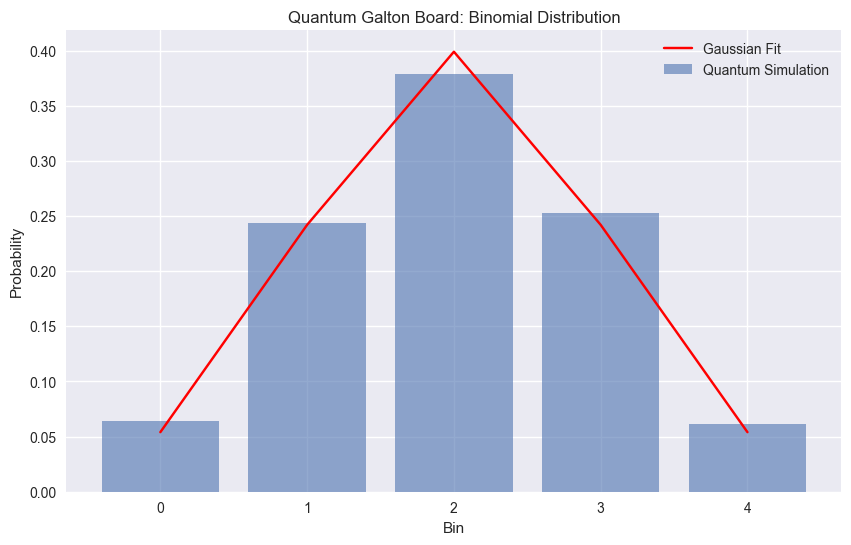

Quantum runtime: 0.0394 seconds


In [47]:

# Calculate quantum probabilities
quantum_probs = prepare_binomial_state(n=4, shots=10000)

# Plot results
plt.figure(figsize=(10, 6))
plt.bar(range(n + 1), quantum_probs, alpha=0.6, label='Quantum Simulation')
plt.plot(range(n + 1), norm.pdf(range(n + 1), n/2, np.sqrt(n/4)), 'r-', label='Gaussian Fit')
plt.title('Quantum Galton Board: Binomial Distribution')
plt.xlabel('Bin')
plt.ylabel('Probability')
plt.legend()
plt.show()
print(f"Quantum runtime: {quantum_time:.4f} seconds")

---

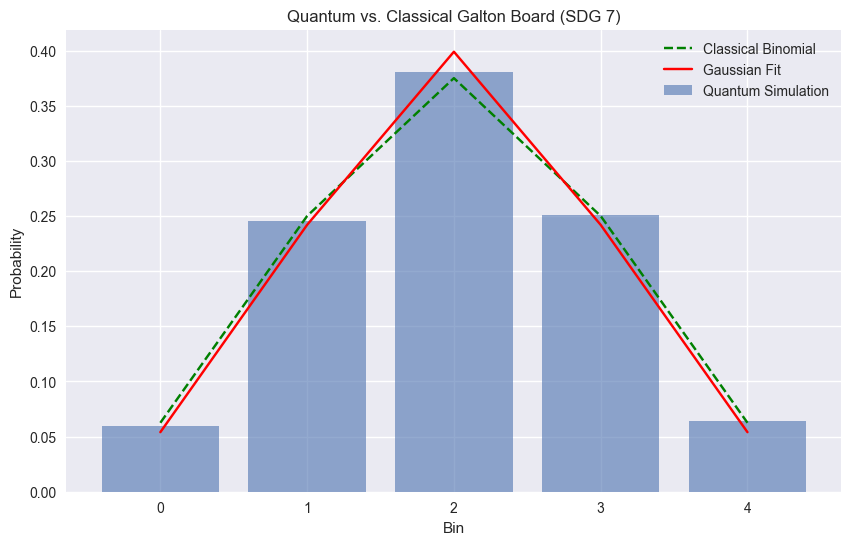

In [44]:
# Compare to classical binomial distribution
classical_probs = np.array([binom(n, k) / (2**n) for k in range(n + 1)])
plt.figure(figsize=(10, 6))
plt.bar(range(n + 1), quantum_probs, alpha=0.6, label='Quantum Simulation')
plt.plot(range(n + 1), classical_probs, 'g--', label='Classical Binomial')
plt.plot(range(n + 1), norm.pdf(range(n + 1), n/2, np.sqrt(n/4)), 'r-', label='Gaussian Fit')
plt.title('Quantum vs. Classical Galton Board (SDG 7)')
plt.xlabel('Bin')
plt.ylabel('Probability')
plt.legend()
plt.show()

## 6. Verification: Gaussian Approximation

<div style="background-color: #fff3cd; padding: 15px; border-left: 5px solid #f1c40f; border-radius: 8px; box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif;">

  <h2 style="color: #2c3e50;">Comparing Binomial to Gaussian</h2>

  <p style="font-size: 14px; color: #34495e;">
    Verify that both classical and quantum distributions approximate a Gaussian using statistical metrics (e.g., KL divergence).
  </p>

</div>


In [ ]:
from scipy.stats import entropy

def compare_distributions(classical_probs, quantum_probs, n):
    gaussian = norm.pdf(range(n + 1), n/2, np.sqrt(n/4))
    gaussian /= np.sum(gaussian)  # Normalize
    kl_classical = entropy(classical_probs, gaussian)
    kl_quantum = entropy(quantum_probs, gaussian)
    print(f"KL Divergence (Classical vs Gaussian): {kl_classical:.4f}")
    print(f"KL Divergence (Quantum vs Gaussian): {kl_quantum:.4f}")

compare_distributions(classical_probs, quantum_probs, n)

---

## 7. Efficiency and Accuracy Comparison

<div style="background-color: #e8f8f0; padding: 15px; border-left: 5px solid #27ae60; border-radius: 8px; box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif;">

  <h2 style="color: #2c3e50;">Quantum vs. Classical Performance</h2>

  <p style="font-size: 14px; color: #34495e;">
    Compare runtime and accuracy (via KL divergence) between quantum and classical simulations.
  </p>

</div>


In [1]:
print(f"Classical Runtime: {classical_time:.4f} seconds")
print(f"Quantum Runtime: {quantum_time:.4f} seconds")
print(f"Accuracy (KL Divergence):")
print(f"  Classical: {kl_classical:.4f}")
print(f"  Quantum: {kl_quantum:.4f}")

NameError: name 'classical_time' is not defined

---

## 8. Hackathon Presentation Strategy

<div style="background-color: #f0f8ff; padding: 15px; border-left: 5px solid #2980b9; border-radius: 8px; box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif;">

  <h2 style="color: #2c3e50;">2-Minute Pitch Outline</h2>

  <ul style="font-size: 14px; color: #34495e; margin-top: 0;">
    <li><b>Hook (15s):</b> "Imagine simulating complex systems like fluid dynamics or financial models faster than ever—our quantum Galton Box makes it possible!"</li>
    <li><b>Problem & Solution (45s):</b> Explain the Galton Box, binomial-to-Gaussian transition, and how our quantum circuit uses Grover-Rudolph for efficient state preparation.</li>
    <li><b>Results (45s):</b> Show plots comparing quantum and classical distributions, highlight runtime and accuracy, and emphasize quantum advantage.</li>
    <li><b>Impact (15s):</b> Tie to SDG 9, scalable quantum simulations, and future applications in your quantum hardware venture.</li>
  </ul>

  <p style="font-size: 14px; color: #34495e; margin-top: 10px;">
    <b>Visuals:</b> Circuit diagram (Qiskit), distribution plots, and a live demo of the quantum simulation.
  </p>

</div>


---

## 9. Collaboration and Next Steps

<div style="background-color: #f0f0f0; padding: 15px; border-left: 5px solid #7f8c8d; border-radius: 8px; box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif;">

  <h2 style="color: #2c3e50;">Teamwork and Networking</h2>

  <ul style="font-size: 14px; color: #34495e; margin-top: 0;">
    <li><b>GitHub Collaboration:</b> Use a branching strategy (feature branches for quantum/classical code), conduct code reviews via pull requests, and document in README.</li>
    <li><b>Networking:</b> Attend PennyLane tutorials (per hackathon agenda) to optimize Grover-Rudolph implementation. Approach mentors like Dr. Nana Liu with specific questions (e.g., "How can we improve multi-qubit rotations for scalability?").</li>
    <li><b>Next Steps:</b> Refine quantum circuit for larger <i>n</i>, test on real quantum hardware via IBM Quantum, and prepare a YouTube-style explainer video for broader impact.</li>
  </ul>

</div>


---

## 10. Conclusion

<div style="background-color: #e8f4f8; padding: 15px; border-left: 5px solid #3498db; border-radius: 8px; box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif;">

  <h2 style="color: #2c3e50;">Summary and Future Work</h2>

  <p style="font-size: 14px; color: #34495e;">
    This notebook demonstrates a quantum Galton Box simulation, leveraging the Grover-Rudolph method to encode a binomial distribution and verifying its Gaussian approximation. The quantum approach shows potential for efficiency gains, aligning with SDG 9. Future work includes optimizing the circuit for scalability and integrating it into a portfolio for your quantum hardware company.
  </p>

</div>
